In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Datos experimentales tomados para el ciclotrón de protones: $R=1m$, $E_{max}=200MeV$, $m_p=1.673\times 10^{-27}kg$, $q=1,602\times 10^{-19}C$ y $v_0=1.0\times 10^{3}\frac{m}{s}$.

In [2]:
R=1
E=200
q=1.602E-19
E=E*10**6*q
m=1.673E-27
v_0=4E6

Cálculo del campo magnético $B$ perpendicular aplicado, distancia $d$ entre las D's del cilotrón, frecuencia de ciclotrón $\omega_{ciclotrón}$ y campo eléctrico máximo aplicado $E_0$ entre las D's.  

In [4]:
B=np.sqrt(2*m*E)/(q*R)
d=R/8
omega=q*B/m
E0=1.0E5*B

Definición del campo eléctrico aplicado en el Ciclotrón.

In [5]:
def campoElectrico(x,t):
    E=0.0
    if x>=-d/2 and x<=d/2:
        E=E0*np.cos(omega*t)
    return E     

Definición de la trayectoria del protón en el Ciclotrón, con el paso a paso de Feynmann. Allí se tiene en cuenta las fuerzas presentes en cada una de las regiones del acelerador y se retorna el tiempo, posición y velocidad del protón en el plano $xy$.

In [6]:
def pasoApaso(q,B,v_0,theta_0,m,N,R):
    t=[0.0]
    omega=q*B/m
    dt=2*np.pi/(omega*N)
    x=[-d/2]
    y=[0]
    v_x=[-v_0*np.sin(theta_0)]
    v_y=[v_0*np.cos(theta_0)]
    r=0
    while r<=R:
        a_x=omega*v_y[-1]
        a_y=-omega*v_x[-1]+campoElectrico(x[-1],t[-1])*q/m
        x_new=x[-1]+v_x[-1]*dt
        y_new=y[-1]+v_y[-1]*dt
        x.append(x_new)
        y.append(y_new)
        v_x.append(v_x[-1]+a_x*dt)
        v_y.append(v_y[-1]+a_y*dt)
        t.append(t[-1]+dt)
        r=np.sqrt(x[-1]**2+y[-1]**2)
    x=np.array(x)
    y=np.array(y)
    v_x=np.array(v_x)
    v_y=np.array(v_y)
    t=np.array(t)
    return t,x,y,v_x,v_y

Cálculo de la trayectoria del protón con los datos experimentales dados y con pasos de tiempo $dt=\frac{2\pi}{N\omega_{ciclotrón}}$.

In [11]:
N=150
t,x,y,vx,vy=pasoApaso(q,B,v_0,0.0,m,N,R)

In [12]:
0.5*m*(vx[-1]**2+vy[-1]**2),E

(3.234409822218422e-11, 3.204e-11)

Gráfica de la trayectoria descrita por el protón en el Ciclotrón.

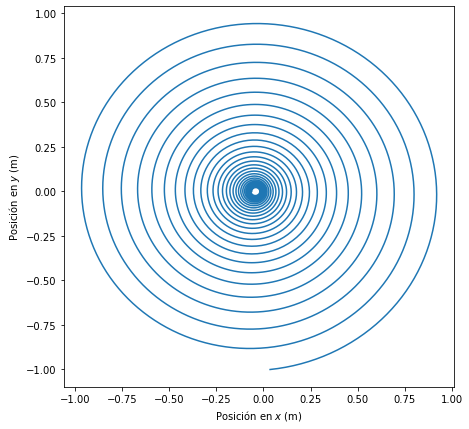

In [29]:
plt.figure(figsize=(7,7))
plt.plot(x,y)
plt.xlabel("Posición en "+r"$x$ "+"(m)")
plt.ylabel("Posición en "+r"$y$ "+"(m)")
plt.savefig("trayectoriaCiclotron.svg")

Elección de índices en $x$ cercano a cero o en el rango $-\epsilon\leq x\leq \epsilon$ para $\epsilon=0.002 m$.

In [14]:
ii=x<0.002
ii1=x>-0.002
jj=ii*ii1

Cálculo de la evolución del momento y determinación del radio de la trayectoria en $-\epsilon\leq x\leq \epsilon$ a partir de $r=\sqrt{x^2+y^2}$ y $r_p=\frac{1}{qB}\sqrt{p_x^2+p_y^2}$.

In [15]:
px=m*vx
py=m*vy
r=np.sqrt(x[jj]**2+y[jj]**2)
rp=np.sqrt(px[jj]**2+py[jj]**2)/(q*B)

Regresión lineal de los datos $r$ y $r_p$ para radios grandes.

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
regr=linear_model.LinearRegression()
regr.fit(r.reshape(-1, 1)[30:],rp[30:])
rp_fit=regr.predict(r.reshape(-1, 1))
print("Los datos se comportan linealmente según la ecuación: "+r"$r_p={}r+{}m$.".format(regr.coef_[0],regr.intercept_))
#+" Con un error de varianza: {}".format(r2_score(rp,rp_fit))
print("La pendiente se acerca a 1 tal como se esperaba.")

Los datos se comportan linealmente según la ecuación: $r_p=0.9826606246334788r+0.01194577104608241m$.
La pendiente se acerca a 1 tal como se esperaba.


Gráfica de los radios cálculados con posición y momento para las posiciones de $x$ cercanas a cero.

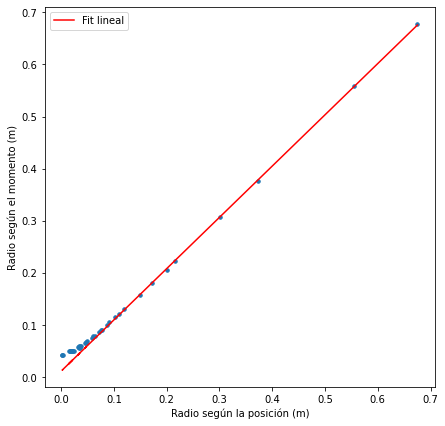

In [30]:
plt.figure(figsize=(7,7))
plt.scatter(r,rp, s=12)
plt.plot(r,rp_fit, c="red", label="Fit lineal")
plt.xlabel("Radio según la posición (m)")
plt.ylabel("Radio según el momento (m)")
plt.legend()
plt.savefig("radiosCiclo.svg")

Escogencia de tiempos en las posiciones $x>0$ y $-\epsilon\leq y\leq \epsilon$.

In [19]:
ll0=x>0
ll1=y<0.002
ll2=y>-0.002
ll=ll0*ll1*ll2
t[ll]

array([1.76575025e-07, 1.76789055e-07, 2.08679575e-07, 2.08893606e-07,
       2.40998156e-07, 2.73102706e-07, 3.05207256e-07, 3.37311806e-07,
       3.69416356e-07, 4.01520906e-07, 6.26466786e-07, 6.58571336e-07,
       6.90675886e-07])

Determinación de los periodos consecutivos y el número de vueltas que satistacen las condicones en $x$ y $y$.

In [20]:
T=np.zeros(len(t[ll])-1)
for j in range(len(t[ll])-1):
    T[j]=t[ll][j+1]-t[ll][j]
vuelta=np.arange(0,len(T),1)
vuelta

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Gráfica de los periodos consecutivos en función de cada una de las vueltas comparadas con el valor teórico $T=\frac{2\pi}{\omega_{ciclotrón}}=3,2105\times 10^{-8}s$.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


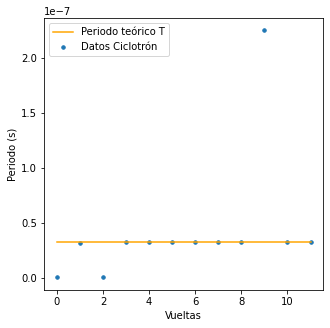

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(vuelta,T, s=12, label="Datos Ciclotrón")
plt.plot(vuelta,2*np.pi/omega*np.ones(len(vuelta)), c="orange", label="Periodo teórico T")
plt.legend()
plt.ylabel("Periodo (s)")
plt.xlabel("Vueltas")
plt.savefig("periodoVueltas.eps")

Se tiene un error cuadrático medio en el periodo hallado como sigue:

In [28]:
errorT=np.sqrt((1/len(vuelta))*np.sum((T-2*np.pi/omega*np.ones(len(vuelta)))**2))
print("La desviación en el periodo es de {}s.".format(errorT))

El error cuadrático medio en el periodo es de 5.717067652522331e-08s.


Cálculo de la energía de la trayectoria de Ciclotrón a partir de $E=\frac{p_x^2+p_y^2}{2m}$ a los distintos tiempos.

In [23]:
energy=(px**2+py**2)/(2*m)

Gráfica de Energía en función del tiempo con el fin de ver el comportamiento del Ciclotrón hasta alcanzar $E=200 MeV$.

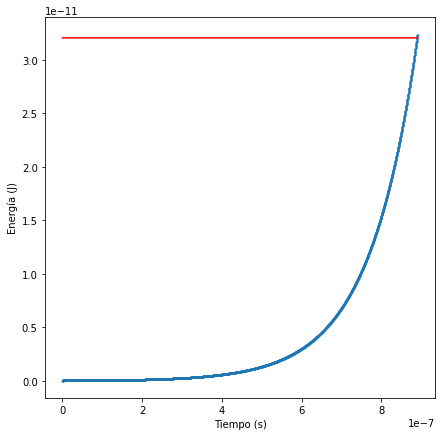

In [34]:
plt.figure(figsize=(7,7))
plt.scatter(t,energy, s=1)
plt.plot(t,E*np.ones(len(t)), c="red")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energía (J)")
plt.savefig("energiaTiempo.svg")

Diagrama de fase de posición y momento en $x$.

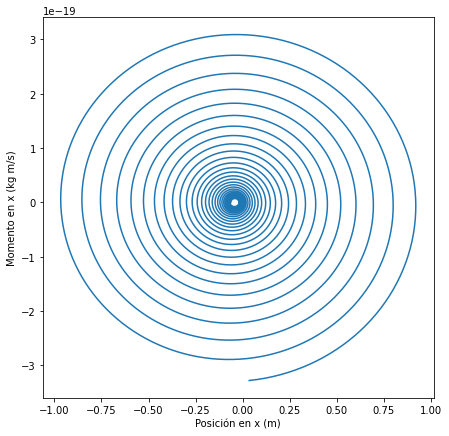

In [35]:
plt.figure(figsize(7,7))
plt.plot(x,px)
plt.xlabel("Posición en x (m)")
plt.ylabel("Momento en x (kg m/s)")
plt.savefig("diagramaFaseX.svg")

Diagrama de fase de posición y momento en $y$.

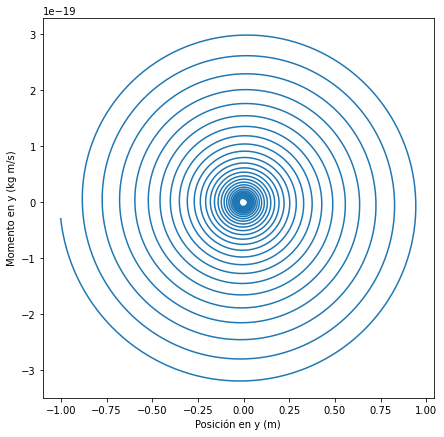

In [36]:
plt.figure(figsize(7,7))
plt.plot(y,py)
plt.xlabel("Posición en y (m)")
plt.ylabel("Momento en y (kg m/s)")
plt.savefig("diagramaFaseY.eps")